# Imports

In [1]:
# run this to fix or avoid dataloader warnings and data loading incorrectly
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 23kB/s 
     |████████████████████████████████| 4.0MB 43.5MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *

In [ ]:
!ls /usr/local/lib/python3.7/dist-packages/fastai

basic_data.py	datasets.py	      metrics.py	  train.py
basics.py	distributed.py	      __pycache__	  utils
basic_train.py	gen_doc		      script.py		  version.py
callback.py	general_optimizer.py  sixel.py		  vision
callbacks	imports		      tabular		  widgets
collab.py	__init__.py	      test_registry.json
core.py		launch.py	      text
data_block.py	layers.py	      torch_core.py


In [ ]:
!cat /usr/local/lib/python3.7/dist-packages/fastai/version.py

__all__ = ['__version__']
__version__ = '1.0.61'


# Download data

In [4]:
api_token = {"username": "x", "key": "y"} #
!mkdir -p ~/.kaggle/
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!ls -la /root/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 May 14 14:59 .
drwx------ 1 root root 4096 May 14 14:59 ..
-rw------- 1 root root   73 May 14 14:59 kaggle.json


In [5]:
path = Config.data_path()/'breast-cancer'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/breast-cancer')

In [6]:
!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset -p {path}

100% 195M/195M [00:02<00:00, 53.0MB/s]



In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/breast-cancer/breast-ultrasound-images-dataset.zip'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT')]

In [7]:
!unzip -q -n {path}/breast-ultrasound-images-dataset.zip -d {path}

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/breast-cancer/breast-ultrasound-images-dataset.zip'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT')]

In [ ]:
!rm -rf /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT

In [ ]:
!ls -la /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT #/models

total 76
drwxr-xr-x 5 root root  4096 Apr 24 14:43 .
drwxr-xr-x 3 root root  4096 Apr 24 14:43 ..
drwxr-xr-x 2 root root 36864 Apr 24 14:43 benign
drwxr-xr-x 2 root root 20480 Apr 24 14:43 malignant
drwxr-xr-x 2 root root 12288 Apr 24 14:43 normal


In [8]:
path = path/'Dataset_BUSI_with_GT'

# Load data

In [ ]:
files = get_image_files(path, recurse=True)
len(files), type(files)

(1578, list)

In [ ]:
files[:3]

[PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/malignant/malignant (54)_mask.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/malignant/malignant (179).png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/malignant/malignant (106)_mask.png')]

In [9]:
mask_files = list(sorted(path.rglob('*_mask.png')))
len(mask_files), mask_files[0]

(780,
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (1)_mask.png'))

In [10]:
img_files = list(sorted(path.rglob('*[!_mask].png')))
len(img_files), img_files[0]

(798,
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (1).png'))

In [ ]:
bad_files = list(sorted(path.rglob('*_mask_*')))
# len(bad_files)
bad_files

[PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (163)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (173)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (181)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (195)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (195)_mask_2.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (25)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (315)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (346)_mask_1.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (4)_mask_1.png'),
 Po

In [ ]:
tst = list(path.rglob('*benign (195)*')); tst

[PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (195).png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (195)_mask_2.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (195)_mask.png'),
 PosixPath('/root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (195)_mask_1.png')]

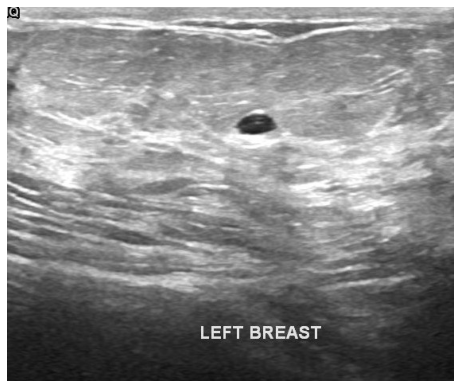

In [11]:
img1 = open_image(img_files[0])
img1.show(figsize=(8,8))

## Y functions

In [12]:
def get_y_fn(x): return path/f"{x.parent.name}/{x.stem}{x.suffix}"
def label_func(x): 
  if 'mask_' not in x.stem:
    return path/f"{x.parent.name}/{x.stem}_mask{x.suffix}"

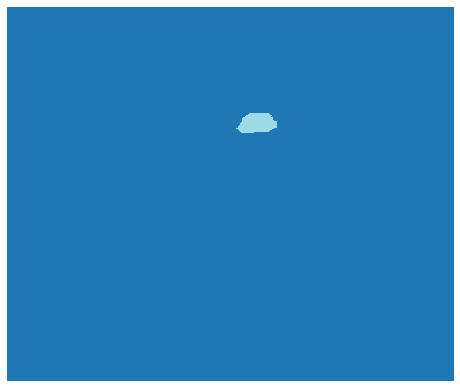

In [13]:
mask = open_mask(get_y_fn(mask_files[0]), div=True)
mask.show(figsize=(8,8), alpha=1)

In [14]:
mask.shape , np.unique(mask)

(torch.Size([1, 471, 562]), array([ImageSegment (1, 471, 562)], dtype=object))

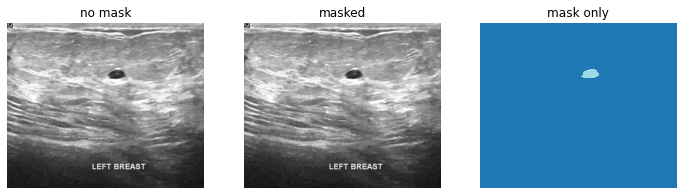

In [15]:
_,axs = plt.subplots(1,3, figsize=(12,6))
img1.show(ax=axs[0], title='no mask')
img1.show(ax=axs[1], title='masked')
mask.show(ax=axs[2], title='mask only', alpha=1.)


In [ ]:
rle_encode(mask.data)

''

In [16]:
src_size = np.array(mask.shape[1:])
src_size

array([471, 562])

In [17]:
size = src_size//2
size

array([235, 281])

In [18]:
codes = np.array(['normal', 'benign', 'malignant'])
codes

array(['normal', 'benign', 'malignant'], dtype='<U9')

## Mask converter

In [ ]:
mask_tmp = open_mask(get_y_fn(mask_files[3])).data.numpy()
np.unique(mask_tmp)

array([0, 1])

In [ ]:
m = open_mask(get_y_fn(mask_files[3])).data.numpy()#.flatten()
print(mask_files[3])
# nm = np.zeros(mask.shape)
# nm[m == 255] = 2
nm.shape, np.unique(nm), m.shape, np.unique(m)

In [19]:
# from https://forums.fast.ai/t/unet-segmentation-mask-converter-to-help-against-common-errors-problems/42949
from fastai.callbacks.hooks import *
import PIL.Image as PilImage

def replace_mask_values_zero_to_n(mask, class_value):
  new_mask = np.zeros(mask.shape)
  new_mask[mask == 255] = class_value
  return new_mask

def convert_mask_to_pil_and_save(mask, save_to):
  image_size = mask.squeeze().shape
  im = PilImage.new('L', (image_size[1], image_size[0]))
  im.putdata(mask.astype('uint8').ravel())
  im.save(save_to)

def convert_masks_to_grayscale_zero_to_n(mask_files, save_to_path):
  labels = {'benign' : 1, 'malignant' : 2}
  for current_file in mask_files:
    if current_file.parent.name != 'normal':
      current_mask = open_mask(current_file).data.numpy()
      class_value = labels[current_file.parent.name]
      converted_mask = replace_mask_values_zero_to_n(current_mask, class_value)
      convert_mask_to_pil_and_save(converted_mask, 
                                   save_to_path/f'{current_file.parent.name}/{current_file.name}')
  print('Conversion finished!')

In [ ]:
mask_files[0].parent.name

'benign'

In [20]:
convert_masks_to_grayscale_zero_to_n(mask_files, path)

Conversion finished!


# Data loader

In [ ]:
# raw masks convertion classes
class SegmentationLabelListWithDiv(SegmentationLabelList):
    def open(self, fn): return open_mask(fn, div=True)
class SegmentationItemListWithDiv(SegmentationItemList):
    _label_cls = SegmentationLabelListWithDiv

In [ ]:
# for raw mask files
src = (SegmentationItemListWithDiv.from_folder(path, recurse=True)
        .filter_by_func(lambda x: '_mask' not in x.stem)
        .split_by_rand_pct()
        .label_from_func(label_func, classes=codes)) # get_y_fn

In [21]:
# for converted mask files
src = (SegmentationItemList.from_folder(path, recurse=True)
        .filter_by_func(lambda x: '_mask' not in x.stem)
        .split_by_rand_pct()
        .label_from_func(label_func, classes=codes)) # get_y_fn

In [ ]:
test_l = src.label_from_func(get_y_fn, classes=codes); test_l

LabelLists;

Train: LabelList (624 items)
x: SegmentationItemListWithDiv
Image (3, 469, 555),Image (3, 574, 776),Image (3, 578, 770),Image (3, 494, 556),Image (3, 648, 757)
y: SegmentationLabelListWithDiv
ImageSegment (1, 469, 555),ImageSegment (1, 574, 776),ImageSegment (1, 578, 770),ImageSegment (1, 494, 556),ImageSegment (1, 648, 757)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT;

Valid: LabelList (156 items)
x: SegmentationItemListWithDiv
Image (3, 331, 526),Image (3, 695, 810),Image (3, 582, 769),Image (3, 587, 620),Image (3, 461, 562)
y: SegmentationLabelListWithDiv
ImageSegment (1, 331, 526),ImageSegment (1, 695, 810),ImageSegment (1, 582, 769),ImageSegment (1, 587, 620),ImageSegment (1, 461, 562)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT;

Test: None

In [33]:
dls = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=4) # 8
        # .normalize()
        .normalize(imagenet_stats)
)

In [43]:
from matplotlib import colors
custom_cmap = colors.ListedColormap(["red", "green", "blue"])
custom_norm = colors.Normalize(vmin=0, vmax=2)

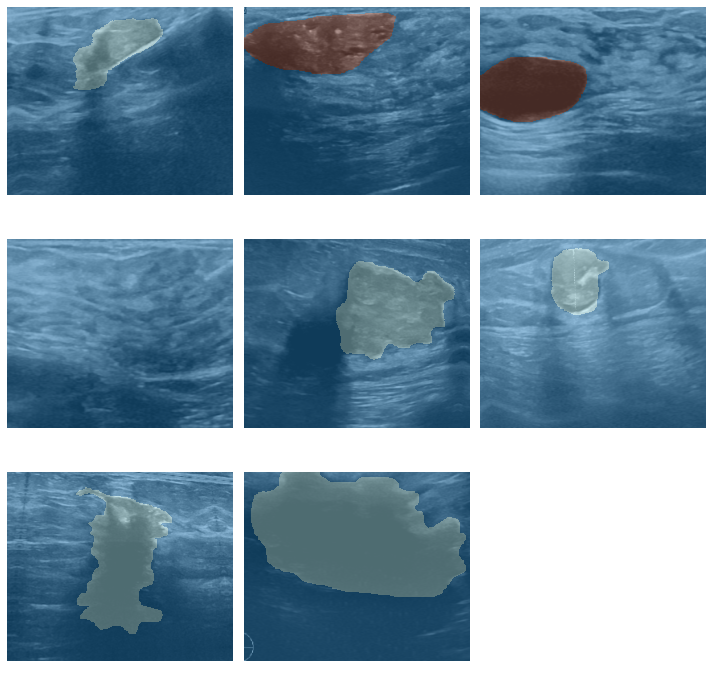

In [ ]:
dls.show_batch(rows=3, figsize=(10,10), cmap=custom_cmap, norm=custom_norm)

In [ ]:
dls.show_batch(rows=3, figsize=(10,10), alpha=.5) # , class_names=codes, reverse=True, vmin=0, vmax=2

In [ ]:
dls.valid_ds.classes, dls.c

(array(['normal', 'benign', 'malignant'], dtype='<U9'), 3)

In [ ]:
dls.single_from_classes

<function fastai.vision.data.ImageDataBunch.single_from_classes>

In [ ]:
dls.train_ds[0]

(Image (3, 235, 281), ImageSegment (1, 235, 281))

In [ ]:
dls.valid_ds.

SegmentationLabelListWithDiv (156 items)
ImageSegment (1, 578, 772),ImageSegment (1, 451, 573),ImageSegment (1, 468, 552),ImageSegment (1, 464, 554),ImageSegment (1, 583, 779)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT

In [ ]:
dls.valid_ds

LabelList (156 items)
x: SegmentationItemListWithDiv
Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281)
y: SegmentationLabelListWithDiv
ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT

In [ ]:
dls.presize

<bound method _presize of ImageDataBunch;

Train: LabelList (624 items)
x: SegmentationItemListWithDiv
Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281)
y: SegmentationLabelListWithDiv
ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT;

Valid: LabelList (156 items)
x: SegmentationItemListWithDiv
Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281)
y: SegmentationLabelListWithDiv
ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT;

Test: None>

In [ ]:
dls.batch_stats

<bound method ImageDataBunch.batch_stats of ImageDataBunch;

Train: LabelList (624 items)
x: SegmentationItemListWithDiv
Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281)
y: SegmentationLabelListWithDiv
ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT;

Valid: LabelList (156 items)
x: SegmentationItemListWithDiv
Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281),Image (3, 235, 281)
y: SegmentationLabelListWithDiv
ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281),ImageSegment (1, 235, 281)
Path: /root/.fastai/data/breast-cancer/Dataset_BUSI_with_GT;

Test: None>

In [ ]:
xc, yc = next(iter(dls.valid_dl))
torch.unique(yc)

tensor([0, 1, 2], device='cuda:0')

# Model resnet34

In [23]:
def custom_loss(y_hat,y):
    y = y.squeeze(1)
    loss = nn.CrossEntropyLoss(ignore_index=255)
    return loss(y_hat,y)

In [24]:
def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

def segment_acc(input, target):
  target = target.squeeze(1)
  return (input.argmax(dim=1)==target).float().mean()

acc_2 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [25]:
# metrics=segment_acc
metrics=[segment_acc, acc_2, f_score]

In [26]:
wd=1e-2

In [34]:
learn = unet_learner(dls, models.resnet34, #wd=wd, 
                    #  pretrained=False,
                    #  y_range=(0,2), 
                    #  loss_func=custom_loss,
                     metrics=metrics)

In [ ]:
learn.summary()

## Train stage 1

epoch,train_loss,valid_loss,segment_acc,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


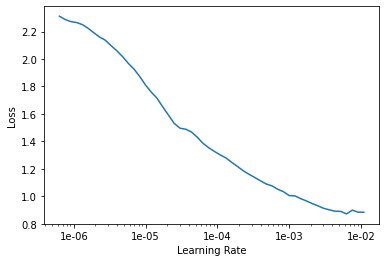

In [35]:
# 2021-05-15 restored, mask converted, pretrained, default loss fn, imagenet normalized
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


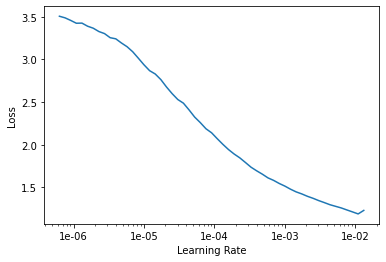

In [ ]:
# 2021-05-14 restored, mask converted, pretrained, default loss fn, raw normalized
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


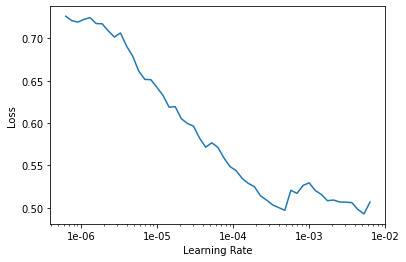

In [ ]:
# 2021-05-14 restored, mask converted, pretrained, default loss fn, imagenet normalized
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


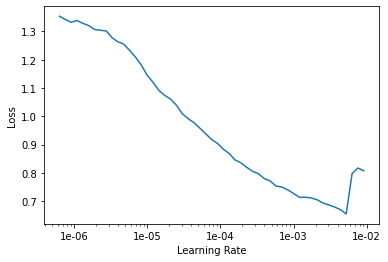

In [ ]:
# 2021-04-24 mask converted, pretrained, custom loss fn, raw normalized.
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


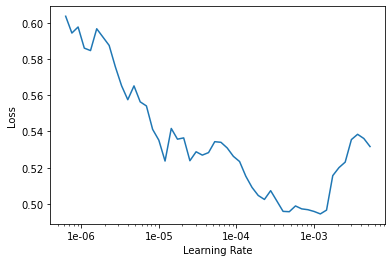

In [ ]:
# 2021-04-24 mask converted, pretrained, default loss fn, raw normalized.
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


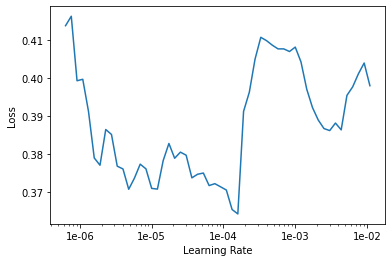

In [ ]:
# 2021-04-22 pretrained. without y_range, wd. raw normalized.
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


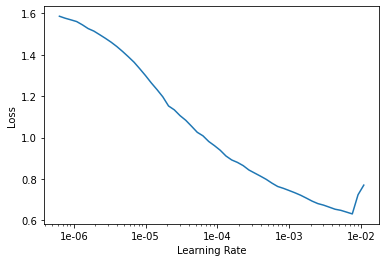

In [ ]:
# 2021-04-18 pretrained. without y_range, wd. raw normalized.
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


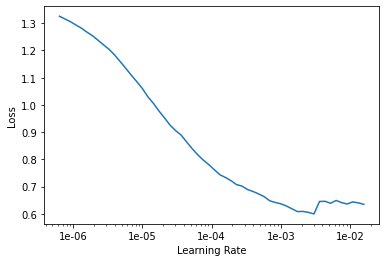

In [ ]:
# 2021-04-18 not pretrained. without y_range, wd. raw normalized.
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


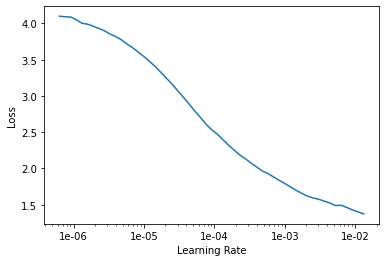

In [ ]:
# 2021-04-18  pretrained. without y_range, wd. imagenet normalized.
lr_find(learn)
learn.recorder.plot()

epoch,train_loss,valid_loss,segment_acc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


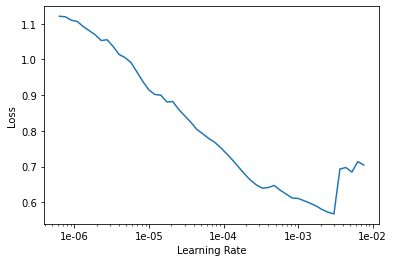

In [ ]:
# 2021-04-16 without y_range
lr_find(learn)
learn.recorder.plot()

### Stage 1 plot losses

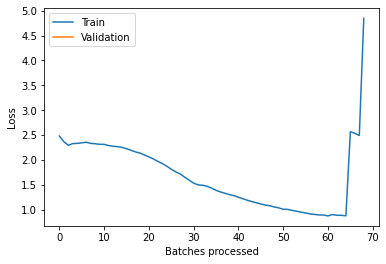

In [36]:
learn.recorder.plot_losses()

In [ ]:
# get predictions
img = learn.data.train_ds[0][0]
learn.predict(img)

In [37]:
learn.save('rn34-stage-1');

In [ ]:
learn.load('rn34-stage-1')

## Train stage 2

In [38]:
# 2021-05-15 mask converted, pretrained, default loss fn, imagenet normalized
learn.fit_one_cycle(10, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,accuracy_thresh,fbeta,time
0,0.645014,0.450450,0.880487,0.060845,0.212740,00:43
1,0.330360,0.323490,0.909216,0.189692,0.211811,00:42
2,0.283823,0.257010,0.919083,0.152664,0.215177,00:42
3,0.280555,0.259765,0.920816,0.233898,0.211289,00:42
4,0.222019,0.222257,0.928342,0.264398,0.210741,00:42
5,0.244937,0.217305,0.929150,0.219617,0.213214,00:42
6,0.218272,0.225870,0.929753,0.241966,0.212623,00:42
7,0.228871,0.211945,0.932629,0.225742,0.211852,00:42
8,0.206959,0.211113,0.933099,0.246496,0.210939,00:42
9,0.206461,0.210001,0.933962,0.256403,0.208828,00:42


In [ ]:
# 2021-05-14 mask converted, pretrained, default loss fn, raw normalized
learn.fit_one_cycle(10, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,1.927699,1.005329,0.732909,0.173584,00:37
1,0.807075,0.465203,0.886457,0.220071,00:37
2,0.436158,0.317061,0.895923,0.226752,00:37
3,0.310763,0.279623,0.913574,0.226558,00:37
4,0.274411,0.264467,0.919452,0.226256,00:37
5,0.256573,0.256516,0.918797,0.226849,00:37
6,0.240742,0.247569,0.923505,0.226353,00:37
7,0.235961,0.240422,0.925503,0.226612,00:37
8,0.225898,0.234755,0.926899,0.226619,00:37
9,0.232431,0.239446,0.925453,0.226606,00:37


In [ ]:
# 2021-05-14 mask converted, pretrained, default loss fn, imagenet normalized
learn.fit_one_cycle(10, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,accuracy_thresh,fbeta,time
0,0.516551,0.437001,0.904366,0.110393,0.218831,00:38
1,0.393736,0.321675,0.908558,0.122115,0.223295,00:37
2,0.301506,0.251849,0.918040,0.128571,0.225518,00:37
3,0.273960,0.259222,0.915007,0.099416,0.226953,00:37
4,0.249898,0.277244,0.912179,0.076485,0.227100,00:37
5,0.230378,0.225227,0.927511,0.091775,0.226647,00:37
6,0.219205,0.221486,0.928429,0.133533,0.225236,00:37
7,0.207869,0.215210,0.929596,0.129692,0.225081,00:37
8,0.217013,0.216146,0.927946,0.109557,0.226617,00:37
9,0.210106,0.213199,0.929804,0.120494,0.226007,00:37


In [ ]:
# 2021-04-24 masks converted, pretrained. raw normalized. custom loss.
learn.fit_one_cycle(5, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.680932,0.410073,0.907959,0.188756,00:37
1,0.396957,0.264485,0.921281,0.188163,00:36
2,0.316813,0.243690,0.927048,0.187368,00:37
3,0.279035,0.219458,0.931725,0.187326,00:36
4,0.271291,0.216021,0.933683,0.187390,00:37


In [ ]:
# 2021-04-24 masks converted, pretrained. raw normalized. default loss.
learn.fit_one_cycle(10, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.500587,0.410810,0.917270,0.108567,00:40
1,0.413436,0.322445,0.922008,0.118920,00:40
2,0.325408,0.244454,0.926382,0.157369,00:40
3,0.280886,0.215360,0.933783,0.161157,00:40
4,0.255209,0.198355,0.938180,0.160875,00:40
5,0.245563,0.192450,0.938699,0.156871,00:40
6,0.234384,0.191222,0.941111,0.156827,00:40
7,0.232131,0.188546,0.940426,0.164314,00:40
8,0.222857,0.179665,0.943379,0.162175,00:40
9,0.233675,0.179702,0.943908,0.159550,00:40


In [ ]:
# 2021-04-24 masks converted pretrained. raw normalized.
learn.fit_one_cycle(5, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.708388,0.418323,0.917193,0.171285,00:40
1,0.406274,0.265663,0.924668,0.182408,00:38
2,0.311669,0.232729,0.930509,0.184969,00:38
3,0.273115,0.219508,0.934195,0.185374,00:38
4,0.262789,0.215775,0.935238,0.185961,00:38


In [ ]:
# 2021-04-23 pretrained. get_transforms(flip_vert=True), y_range(0,2), wd. raw normalized. custom loss.
learn.fit_one_cycle(5, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.666524,0.426614,0.911331,0.183421,00:40
1,0.461274,0.413425,0.914290,0.183421,00:38
2,0.419138,0.411072,0.914368,0.183421,00:38
3,0.417635,0.410976,0.914378,0.183421,00:38
4,0.416101,0.410969,0.914380,0.183421,00:38


In [ ]:
# 2021-04-22 pretrained. custom loss.
learn.fit_one_cycle(5, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.359204,0.278493,0.921646,0.129480,00:35
1,0.267873,0.202808,0.929139,0.130219,00:36
2,0.216311,0.183955,0.935531,0.129861,00:36
3,0.194030,0.167351,0.939963,0.128643,00:36
4,0.186549,0.165904,0.941331,0.129058,00:37


In [ ]:
# pretrained. raw normalized.
learn.fit_one_cycle(5, slice(1e-05), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.656557,0.372169,0.892197,0.155810,00:37
1,0.343509,0.250511,0.914935,0.153803,00:38
2,0.244867,0.214196,0.924404,0.153773,00:37
3,0.213989,0.201667,0.928442,0.153764,00:37
4,0.190264,0.200247,0.928293,0.153761,00:37


In [ ]:
learn.fit_one_cycle(5, slice(lr), wd=wd, pct_start=0.9) # slice(1e-05,1e-02)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.735917,0.673783,0.734975,0.133201,00:39
1,0.595729,0.481899,0.861958,0.127657,00:39
2,0.489260,0.409297,0.893723,0.125267,00:39
3,0.412026,0.348372,0.909835,0.127663,00:39
4,0.368965,0.317430,0.915033,0.129029,00:39


### Stage 2 results

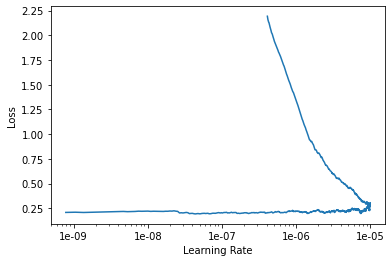

In [39]:
learn.recorder.plot()

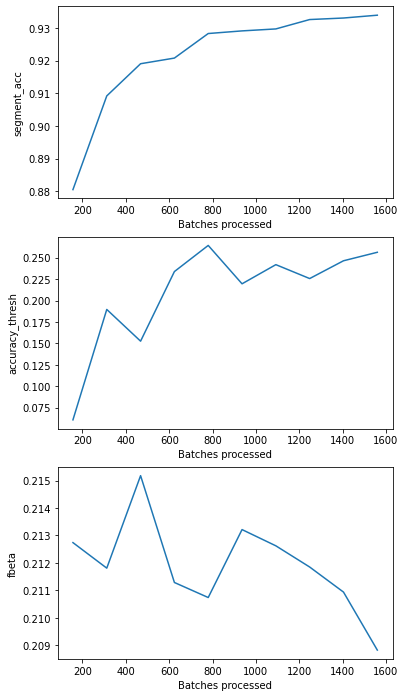

In [40]:
learn.recorder.plot_metrics()

In [41]:
learn.save('rn34-stage-2');

In [ ]:
learn.load('rn34-stage-2')

## Results stage 1

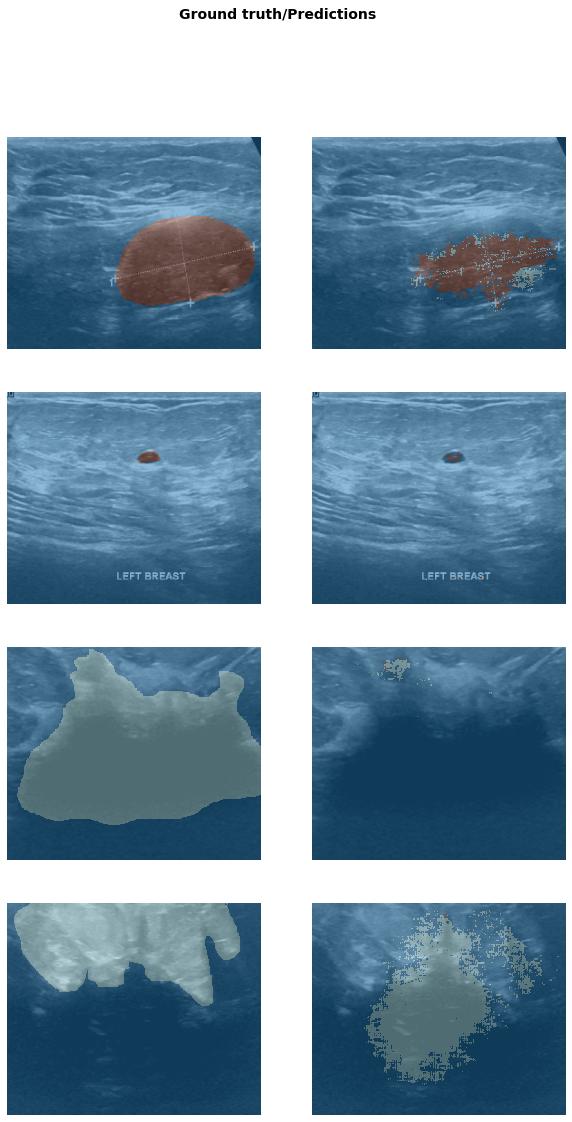

In [44]:
learn.show_results(rows=4, figsize=(10,18), cmap=custom_cmap, norm=custom_norm)

In [ ]:
# get predictions
img2 = learn.data.train_ds[0][0]
learn.predict(img2)

## Unfreeze - stage 2

In [ ]:
# !!! cleanup GPU memory
learn=None
gc.collect()

In [48]:
learn.unfreeze()

In [49]:
# 2021-05-15 mask converted, pretrained, default loss fn, imagenet normalized
learn.fit_one_cycle(10, slice(1e-07, 1e-05/2), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,accuracy_thresh,fbeta,time
0,0.205976,0.205590,0.934267,0.240389,0.210060,00:45
1,0.209626,0.204185,0.934557,0.255950,0.208937,00:44
2,0.207695,0.224278,0.931833,0.339484,0.201497,00:45
3,0.198103,0.213595,0.931576,0.219856,0.213839,00:45
4,0.198619,0.197235,0.936704,0.278138,0.207328,00:45
5,0.209720,0.222360,0.933020,0.250736,0.209035,00:45
6,0.197864,0.217198,0.934542,0.246616,0.209347,00:45
7,0.190496,0.222516,0.933111,0.264245,0.206125,00:45
8,0.195590,0.227302,0.933757,0.274491,0.206183,00:45
9,0.219620,0.225335,0.932605,0.269784,0.207551,00:45


In [ ]:
# 2021-05-14 mask converted, pretrained, default loss fn, raw normalized
learn.fit_one_cycle(10, slice(1e-07, 1e-05/2), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.220070,0.238054,0.925873,0.226632,00:39
1,0.224258,0.243184,0.925919,0.226177,00:39
2,0.236039,0.231440,0.926739,0.226174,00:39
3,0.219903,0.228456,0.928680,0.226442,00:39
4,0.214808,0.228149,0.929503,0.225716,00:39
5,0.215424,0.227029,0.927927,0.225339,00:39
6,0.214540,0.222745,0.930517,0.225927,00:39
7,0.212415,0.220238,0.930937,0.225718,00:39
8,0.208618,0.221943,0.929063,0.225574,00:39
9,0.203854,0.220526,0.930871,0.225431,00:39


In [ ]:
# 2021-05-14 mask converted, pretrained, default loss fn, imagenet normalized
learn.fit_one_cycle(10, slice(1e-07, 1e-05/2), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,accuracy_thresh,fbeta,time
0,0.198166,0.208094,0.930954,0.125615,0.226105,00:39
1,0.208642,0.218448,0.929450,0.137732,0.225689,00:39
2,0.210024,0.205879,0.931914,0.106178,0.226307,00:39
3,0.203483,0.205571,0.932296,0.143935,0.225862,00:39
4,0.207293,0.206998,0.931680,0.129237,0.226569,00:39
5,0.190613,0.209117,0.932054,0.148965,0.224923,00:39
6,0.196162,0.203117,0.932890,0.128392,0.226529,00:39
7,0.190583,0.202089,0.932580,0.123827,0.226179,00:39
8,0.193162,0.197490,0.933564,0.130122,0.226000,00:39
9,0.190573,0.200867,0.933167,0.127935,0.225705,00:39


In [ ]:
# 2021-04-24 masks converted, pretrained. raw normalized. default loss
learn.fit_one_cycle(10, slice(1e-07, 1e-05/2), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.219642,0.179820,0.943247,0.160509,00:40
1,0.225027,0.178025,0.944516,0.155386,00:40
2,0.227981,0.177613,0.943962,0.158093,00:40
3,0.223974,0.174977,0.945559,0.159943,00:40
4,0.230316,0.173564,0.945725,0.157475,00:40
5,0.213193,0.171717,0.946103,0.154902,00:40
6,0.219244,0.168646,0.946334,0.159927,00:40
7,0.210542,0.167459,0.947034,0.157358,00:40
8,0.204545,0.166240,0.947413,0.157921,00:40
9,0.204037,0.168938,0.946618,0.155977,00:40


In [ ]:
# pretrained. raw normalized.
learn.fit_one_cycle(20, slice(1e-06), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.182044,0.200920,0.928753,0.153761,00:37
1,0.185224,0.200621,0.929104,0.153760,00:37
2,0.191559,0.199428,0.929077,0.153757,00:37
3,0.190332,0.196951,0.929872,0.153756,00:37
4,0.184559,0.199506,0.928913,0.153752,00:37
5,0.180102,0.202181,0.929883,0.153748,00:37
6,0.185050,0.194288,0.930685,0.153746,00:37
7,0.177844,0.196282,0.930280,0.153745,00:37
8,0.174446,0.196607,0.929580,0.153742,00:37
9,0.176862,0.199069,0.929136,0.153741,00:37


In [ ]:
# pretrained. imagenet normalized.
learn.fit_one_cycle(10, slice(1e-06), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.193952,0.207608,0.922697,0.151760,01:36
1,0.191385,0.207901,0.925078,0.151756,01:36
2,0.191500,0.201987,0.925254,0.151754,01:35
3,0.184865,0.201407,0.926229,0.151753,01:36
4,0.195353,0.201731,0.923505,0.151752,01:36
5,0.199149,0.205014,0.922346,0.151750,01:36
6,0.190467,0.202436,0.925549,0.151750,01:36
7,0.196898,0.202678,0.925053,0.151749,01:36
8,0.187380,0.203164,0.923801,0.151749,01:35
9,0.190016,0.203009,0.925097,0.151748,01:36


In [ ]:
learn.save('stage-3-unfreezed');

In [ ]:
learn.load('stage-3-unfreezed')

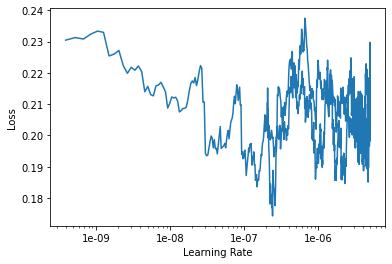

In [50]:
learn.recorder.plot()

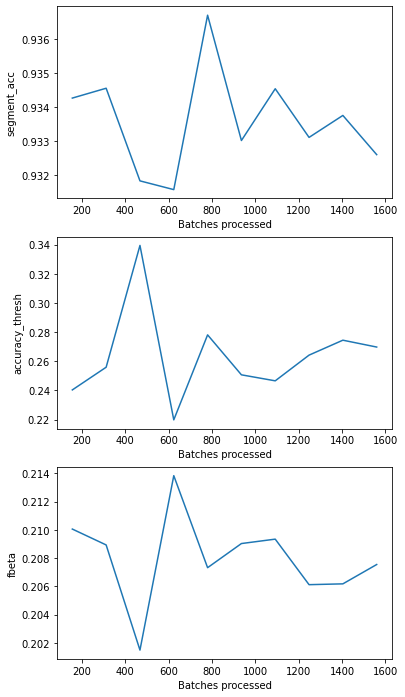

In [51]:
learn.recorder.plot_metrics()

## Results stage 2 unfreezed

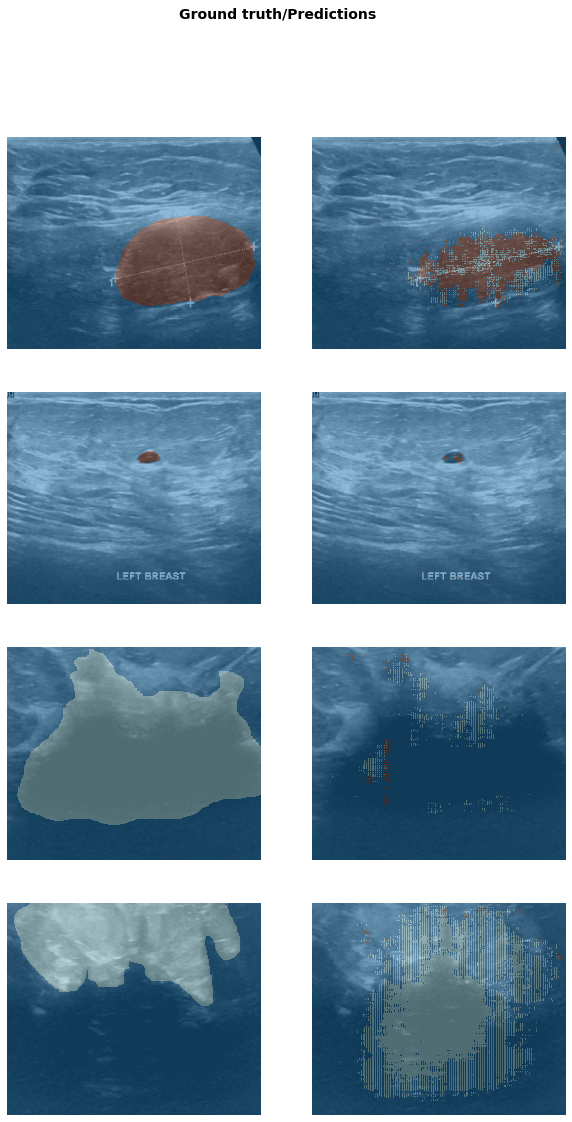

In [52]:
learn.show_results(rows=4, figsize=(10,18), cmap=custom_cmap, norm=custom_norm)

## Learn some more stage 3

In [ ]:
# 2021-04-24 masks converted, pretrained. raw normalized. default loss
learn.fit_one_cycle(10, slice(1e-06), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.211721,0.174067,0.945386,0.147177,00:40
1,0.209281,0.176087,0.944098,0.145784,00:40
2,0.209140,0.176444,0.943952,0.143910,00:40
3,0.220996,0.179479,0.941940,0.142269,00:40
4,0.217539,0.182017,0.943724,0.141404,00:40
5,0.225627,0.186013,0.942090,0.138124,00:40
6,0.223194,0.194433,0.941332,0.138842,00:40
7,0.228082,0.200447,0.938775,0.135461,00:40
8,0.238591,0.199031,0.939290,0.135670,00:40
9,0.243996,0.200430,0.939484,0.135091,00:40


In [ ]:
# SUSTOJAU CIA 2021-04-24 masks converted, pretrained. raw normalized. default loss
learn.fit_one_cycle(10, slice(1e-07, 1e-06), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.201522,0.170507,0.946459,0.156066,00:40
1,0.204694,0.166268,0.946981,0.158002,00:40
2,0.210737,0.168383,0.945756,0.158799,00:40
3,0.202991,0.170596,0.946594,0.154275,00:40
4,0.200568,0.171552,0.946288,0.154543,00:40
5,0.198569,0.172376,0.946605,0.154276,00:40
6,0.202465,0.169602,0.946457,0.155002,00:40
7,0.199363,0.171510,0.945959,0.155691,00:40
8,0.206565,0.172565,0.945755,0.154781,00:40
9,0.206304,0.172579,0.945737,0.155128,00:40


In [ ]:
# pretrained. raw normalized.
learn.fit_one_cycle(20, slice(1e-8, 1e-06), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,fbeta,time
0,0.165992,0.152149,0.944794,0.126710,00:38
1,0.162164,0.155095,0.944134,0.126946,00:38
2,0.167173,0.156907,0.942042,0.126072,00:39
3,0.167477,0.156592,0.942942,0.127145,00:39
4,0.171386,0.154553,0.943341,0.126995,00:39
5,0.167331,0.154013,0.943767,0.126451,00:39
6,0.171507,0.156180,0.942919,0.127220,00:39
7,0.164640,0.156133,0.943440,0.127151,00:39
8,0.166054,0.159301,0.942032,0.126925,00:39
9,0.168429,0.159018,0.942094,0.127428,00:39


## Results stage 3

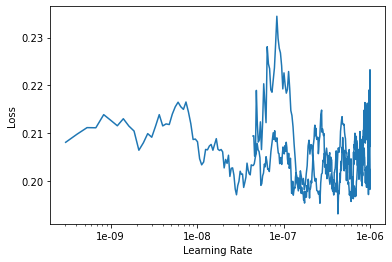

In [ ]:
learn.recorder.plot()

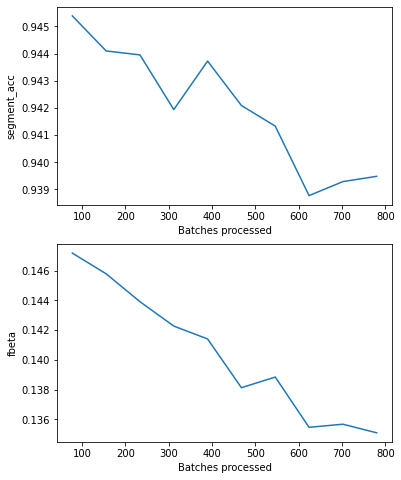

In [ ]:
learn.recorder.plot_metrics()

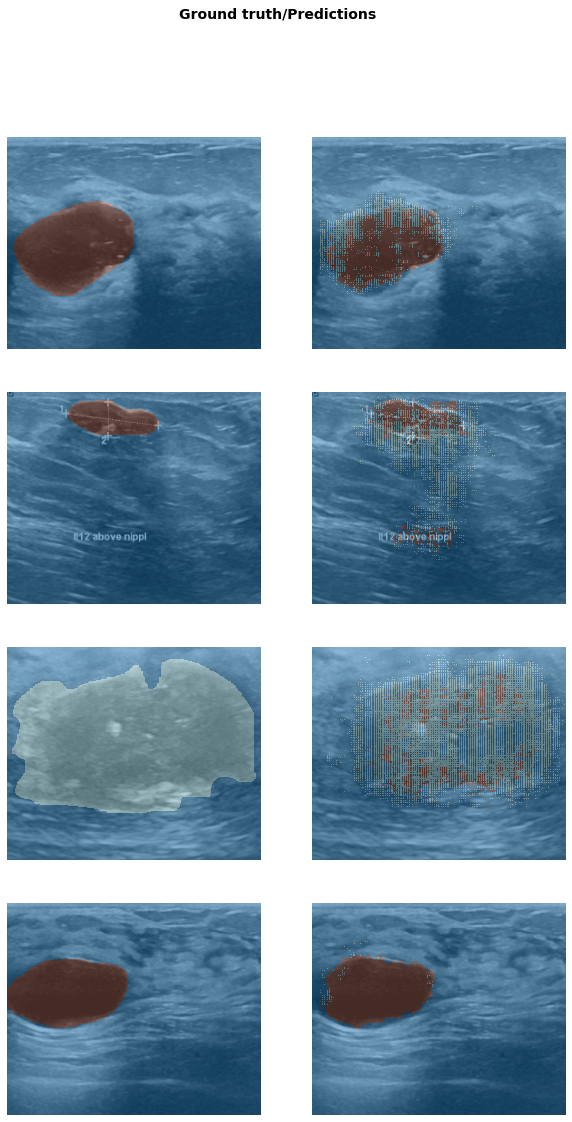

In [ ]:
learn.show_results(rows=4, figsize=(10,18), cmap=custom_cmap, norm=custom_norm)

# Model resnet50

## Train stage 1

In [ ]:
torch.cuda.empty_cache()

In [27]:
learn = unet_learner(dls, models.resnet50, wd=wd, 
                    #  y_range=(0.0,1.0), 
                    #  loss_func=custom_loss,
                     metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,segment_acc,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


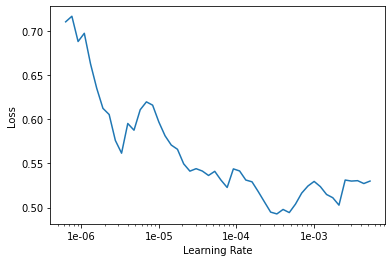

In [28]:
# 2021-05-14 imagenet normalized
lr_find(learn)
learn.recorder.plot()

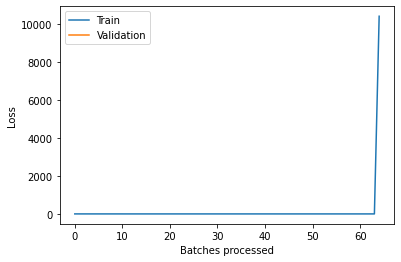

In [29]:
learn.recorder.plot_losses()

In [30]:
learn.save('rn50-stage-1')

## Train stage 2

In [31]:
# 2021-05-14 mask converted, pretrained, default loss fn, imagenet normalized
learn.fit_one_cycle(10, slice(1e-06), wd=1e-2)

epoch,train_loss,valid_loss,segment_acc,accuracy_thresh,fbeta,time
0,0.506734,0.443341,0.908180,0.138660,0.196514,04:58
1,0.372454,0.336375,0.911975,0.228176,0.193818,05:00
2,0.290567,0.273040,0.916630,0.248098,0.201617,05:00
3,0.256811,0.268263,0.920807,0.305548,0.196835,04:59
4,0.249203,0.245720,0.922746,0.266308,0.197911,05:00
5,0.231621,0.239066,0.923421,0.275022,0.195674,04:59


KeyboardInterrupt: ignored